### PCA

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# 1.创建数据: X 是一个有 100个样本，2个特征的矩阵。特征1 是随机数，特征2 是与特征1 呈线性关系并加了一个噪音的值
X = np.empty((100,2))
X[:,0] = np.random.uniform(0.,100,size=100)
X[:,1] = 0.75*X[:,0]+np.random.normal(0,10.,size=100)

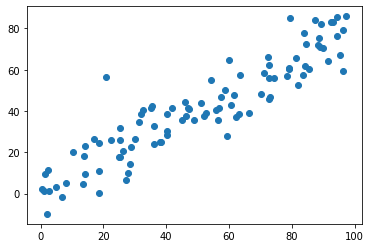

In [10]:
# 2. 将数量集进行绘制
plt.scatter(X[:,0],X[:,1])

In [16]:
# 3.进行 demean 的处理,将 X 矩阵中均值变为 0
#因为均值是每个特征值的均值，所以要先把 X 看为一个行向量
def demean(X):
    return X - np.mean(X,axis=0)

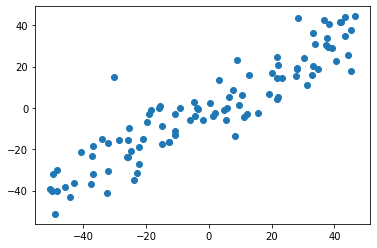

In [17]:
# 4.将 demean 后的矩阵绘制出来
X_mean = demean(X)
plt.scatter(X_mean[:,0],X_mean[:,1])

In [19]:
#从绘制的图形中可以看出数据的坐标轴发生了改变，0跑去了中间
#求均值看是否均值为 0
np.mean(X_mean[:,0])

-2.2524204723595175e-14

In [20]:
np.mean(X_mean[:,1])

2.4868995751603505e-15

### 梯度上升法

In [44]:
# 1.求目标函数的方法
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

In [45]:
# 2.求梯度---调试参数的方法
def df_debug(w,X,epsilion):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

In [46]:
# 求梯度 ---数学公式法
def df_math(w,X):
    return ((X.T.dot(X.dot(w)))*2)/len(w)

In [47]:
# 3.将 w 单位化处理
def direction(w):
    return w / np.linalg.norm(w)

In [64]:
# 4.梯度上升法搜索 w 的值
def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    #将 w 单位化处理
    w = direction(initial_w)
    cur_iters = 0
    last_w = w
    while cur_iters < n_iters:
        w = w -eta*df_math(w,X)
        #每次求 f 的时候都要进行单位化处理
        w = direction(w)
        if(abs(f(w,X)-f(last_w,X))<epsilon):
            break
        cur_iters+=1
    return w

In [54]:
# 5.准备数据，调用梯度上升法的方法
# 初始 initial_w 不可以为 0，这个0可以让 f 导数的整个式子为 0，所以其实 w 是一个极小值，极大值是不为 0 的
initial_w = np.random.random(X_mean.shape[1])
w = gradient_ascent(df_math,X_mean,initial_w)

In [55]:
gradient_ascent(df_debug,X_mean,initial_w，eta = 0.001)

array([0.77634663, 0.6303062 ])

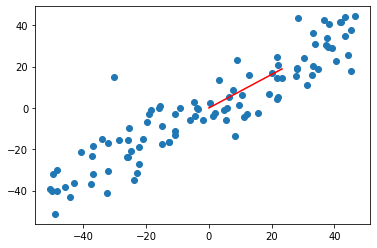

In [58]:
# 6.绘制图像
plt.scatter(X_mean[:,0],X_mean[:,1])
# 将线性关系明显化：plt.plot([x1,x2],[y1,y2]) 这里有两个点 (x1,y1)(x2,y2)可以绘制一个直线
#但是由于 w 的值太小看不清，所以将整个图扩大
#一个是在绘制(0, 0), (1, 2) 两点间的直线；
#另一个是在绘制(0, 0), (30, 60) 两点间的直线。
plt.plot([0,w[0]*30],[0,w[1]*30],color="red")

### 使用极端数据进行测试

In [59]:
# 1.不加噪音的极端数据

In [60]:
X2 = np.empty((100, 2))
X2[:,0] = np.random.uniform(0., 100., size=100)
X2[:,1] = 0.75 * X2[:,0] + 3.

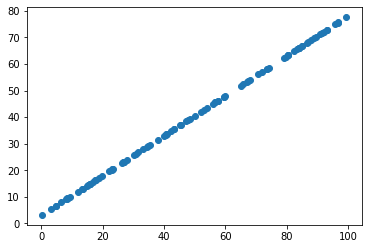

In [61]:
# 就是一个完全的线性关系
plt.scatter(X2[:,0], X2[:,1])

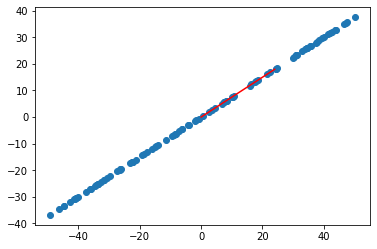

In [65]:
X2_demean = demean(X2)
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta=0.001)
plt.scatter(X2_demean[:,0], X2_demean[:,1])
plt.plot([0, w2[0]*30], [0, w2[1]*30], color='r')